In [1]:
##########################################################################
# Created on Sat Nov 06 16:12:45 2021                                    #
# Python for Financial Analysis and Risk Management                      #
# @author: Meng Lipeng (FRM, CFA)                                        #
##########################################################################

# 7.4.1.Expression

In [16]:
import numpy as np
import utils

C_TB0911=0.0369
m_TB0911=2
y_TB0911=0.024
T_TB0911=4
par=100

Tlist_TB0911=np.arange(1,m_TB0911*T_TB0911+1)/m_TB0911
D1_TB0911=utils.Mac_Duration(C=C_TB0911,M=par,m=m_TB0911,y=y_TB0911,t=Tlist_TB0911)

price_before=utils.Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=y_TB0911,t=Tlist_TB0911)

y_newchange=0.01 #suppose a big change of YTM
price_change1=-D1_TB0911*price_before*y_newchange #approximate 
price_new1=price_before+price_change1
print('new price of 0911(approximate) is ',round(price_new1,4))

y_new=y_TB0911+y_newchange
price_new5=utils.Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=y_new,t=Tlist_TB0911)
print('new price of 0911(accurate) is ',round(price_new5,4))

print('difference between approximate and accurate is ',round(price_new1-price_new5,4))

new price of 0911(approximate) is  100.8916
new price of 0911(accurate) is  100.9676
difference between approximate and accurate is  -0.076


Expression of convexity is \
$$C=\frac{1}{B}\frac{d^2B}{dy^2}=\frac{\sum_{i=1}^{N}c_i{t_i}^2e^{-yt_i}}{B}=\sum_{i=1}^{N}{t_i}^2(\frac{c_ie^{-yt_i}}{B})$$

In [7]:
def Convexity(C,M,m,y,t):
    '''Define a function for calculating Macaulay duraion of a bond
    C:coupon
    M:par of bond
    m:coupon payment frequency per year
    y:YTM(continuous compound) 
    t:array of time to coupon payment date. Single number indicates zero rate bond'''
    if C==0:
        convexity=pow(t,2)
    else:
        coupon=np.ones_like(t)*M*C/m
        NPV_coupon=np.sum(coupon*np.exp(-y*t))
        NPV_par=M*np.exp(-y*t[-1])
        Bond_value=NPV_coupon+NPV_par
        cashflow=coupon
        cashflow[-1]=M*(1+C/m)
        weight=cashflow*np.exp(-y*t)/Bond_value
        convexity=np.sum(pow(t,2)*weight)
    return convexity

In [9]:
Convexity_TB0911=Convexity(C=C_TB0911,M=par,m=m_TB0911,y=y_TB0911,t=Tlist_TB0911)
print('Convexity of 0911 is ',round(Convexity_TB0911,4))

Convexity of 0911 is  14.6968


# 7.4.2.Role of convexity

Use Taylor expansion and ignore the third-order and higher-order terms in the expansion\
We have
$$\Delta B\approx\frac{dB}{dy}\Delta y+\frac{1}{2}\frac{d^2B}{dy^2}(\Delta y)^2\implies\frac{\Delta B}{B}\approx-D\Delta y+\frac{1}{2}C(\Delta y)^2\implies \Delta B\approx-DB\Delta y+\frac{1}{2}CB(\Delta y)^2$$

In [10]:
def Bondprice_change(B,D,C,y_chg):
    '''Define a function to calculate change of bond price using Macaulay duration and convexity
    B:bond price before change
    D:Macauley duration
    C:Convexity
    y_chg:change of YTM'''
    price_change1=-D*B*y_chg
    price_change2=0.5*C*B*pow(y_chg,2)
    price_change=price_change1+price_change2
    return price_change

In [11]:
price_change3=Bondprice_change(B=price_before,D=D1_TB0911,C=Convexity_TB0911,y_chg=y_newchange)
print('change of bond price after considering convexity is ',round(price_change3,4))

change of bond price after considering convexity is  -3.8672


In [12]:
price_new6=price_before+price_change3
print('new price of bond after considersing convexity is ',round(price_new6,4))

new price of bond after considersing convexity is  100.9686


In [15]:
print('difference between approximate and accurate is ',round(price_new6-price_new5,4))

difference between approximate and accurate is  0.001


In [17]:
y_change_list=np.linspace(-0.015,0.015,200)
y_new_list=y_TB0911+y_change_list

price_change_list1=-D1_TB0911*price_before*y_change_list #Only considering Macaulay duration
price_new_list1=price_change_list1+price_before

price_change_list2=Bondprice_change(B=price_before,D=D1_TB0911,C=Convexity_TB0911,y_chg=y_change_list)#Consider Macaulay duration and convexity
price_new_list2=price_change_list2+price_before

price_new_list3=np.ones_like(y_new_list) #Use bond price model
for i in range(len(y_new_list)):
    price_new_list3[i]=utils.Bondprice_onediscount(C=C_TB0911,M=par,m=m_TB0911,y=y_new_list[i],t=Tlist_TB0911)


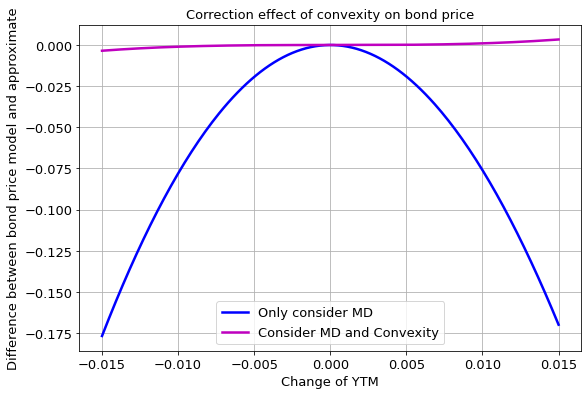

In [18]:
price_diff_list1=price_new_list1-price_new_list3
price_diff_list2=price_new_list2-price_new_list3

import matplotlib.pyplot as plt

plt.figure(figsize=(9,6))
plt.plot(y_change_list,price_diff_list1,'b-',label='Only consider MD',lw=2.5)
plt.plot(y_change_list,price_diff_list2,'m-',label='Consider MD and Convexity',lw=2.5)
plt.xlabel('Change of YTM',fontsize=13)
plt.xticks(fontsize=13)
plt.ylabel('Difference between bond price model and approximate',fontsize=13)
plt.yticks(fontsize=13)
plt.title('Correction effect of convexity on bond price',fontsize=13)
plt.legend(fontsize=13)
plt.grid()
plt.show()